In [100]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA 
from statsmodels.tsa.stattools import adfuller #For Stationary Test

file_path = '/kaggle/input/nifty50-stock-market-data/KOTAKBANK.csv'
temp_df = pd.read_csv(file_path)

temp_df.head(30)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,KOTAKMAH,EQ,212.35,220.00,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11,NaN,NaN,NaN
1,2000-01-04,KOTAKMAH,EQ,229.35,247.70,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12,NaN,NaN,NaN
2,2000-01-05,KOTAKMAH,EQ,246.95,229.00,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12,NaN,NaN,NaN
3,2000-01-06,KOTAKMAH,EQ,228.40,235.10,239.00,217.00,224.95,225.90,226.84,40202,9.119546e+11,NaN,NaN,NaN
4,2000-01-07,KOTAKMAH,EQ,225.90,213.00,219.00,207.85,207.85,208.85,209.94,24463,5.135747e+11,NaN,NaN,NaN
5,2000-01-10,KOTAKMAH,EQ,208.85,215.00,219.00,192.15,192.15,192.15,196.47,12408,2.437804e+11,NaN,NaN,NaN
6,2000-01-11,KOTAKMAH,EQ,192.15,180.20,180.20,176.80,176.80,176.80,176.98,15253,2.699472e+11,NaN,NaN,NaN
7,2000-01-12,KOTAKMAH,EQ,176.80,165.00,169.45,162.70,162.70,162.70,163.34,20558,3.357920e+11,NaN,NaN,NaN
8,2000-01-13,KOTAKMAH,EQ,162.70,149.70,175.70,149.70,163.35,167.35,163.83,103323,1.692773e+12,NaN,NaN,NaN
9,2000-01-14,KOTAKMAH,EQ,167.35,169.00,177.00,156.15,160.50,159.85,161.69,31522,5.096878e+11,NaN,NaN,NaN


In [102]:
#Data Cleaning

data = temp_df.dropna()


data.index = pd.to_datetime(data.Date)
  
data = data["Prev Close"]['2013-01-01':'2013-12-2']
data.describe()

count    230.000000
mean     692.491087
std       45.573821
min      600.650000
25%      654.312500
50%      690.150000
75%      725.487500
max      799.850000
Name: Prev Close, dtype: float64

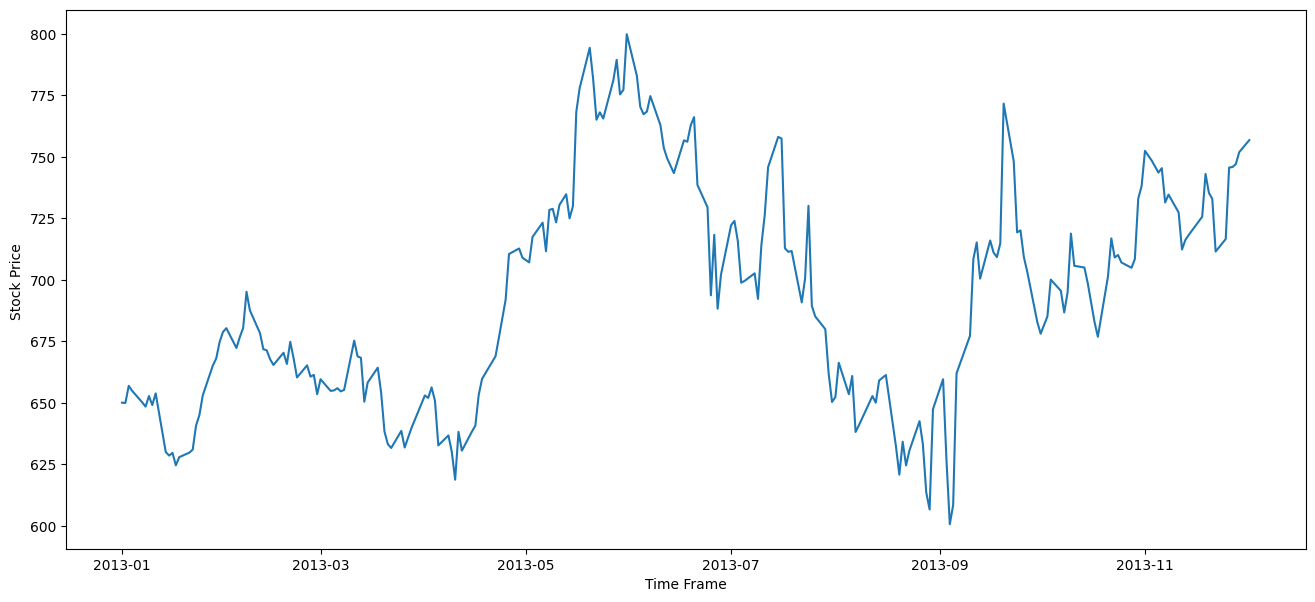

In [103]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price ')
ax1.plot(data)

In [104]:
# Should convert the data to stationary data

# Augmented Dickey-Fuller Test
# The Augmented Dickey-Fuller (ADF) test is a formal statistical test for stationarity. 
# The null hypothesis of the ADF test is that the time series is non-stationary. 
# So, if the p-value of the test is less than the significance level (usually 0.05), 
# you reject the null hypothesis and conclude that the time series is stationary.

result = adfuller(data)  
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.970828
p-value: 0.299509
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


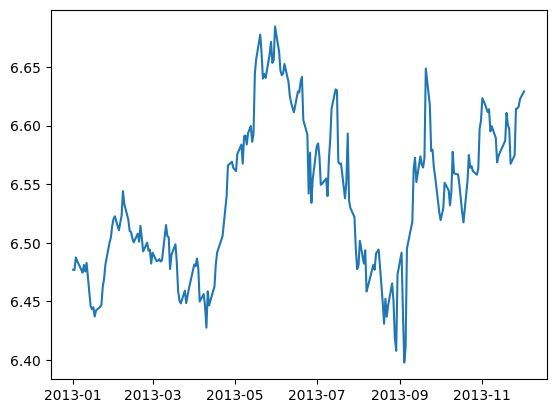

In [107]:
# the p-value is more than 0.05 so I will try transforms and differencing to try and 
# lower the p-value, afterwards I will fit the model. 

data_logged = np.log(data)
plt.plot(data_logged)


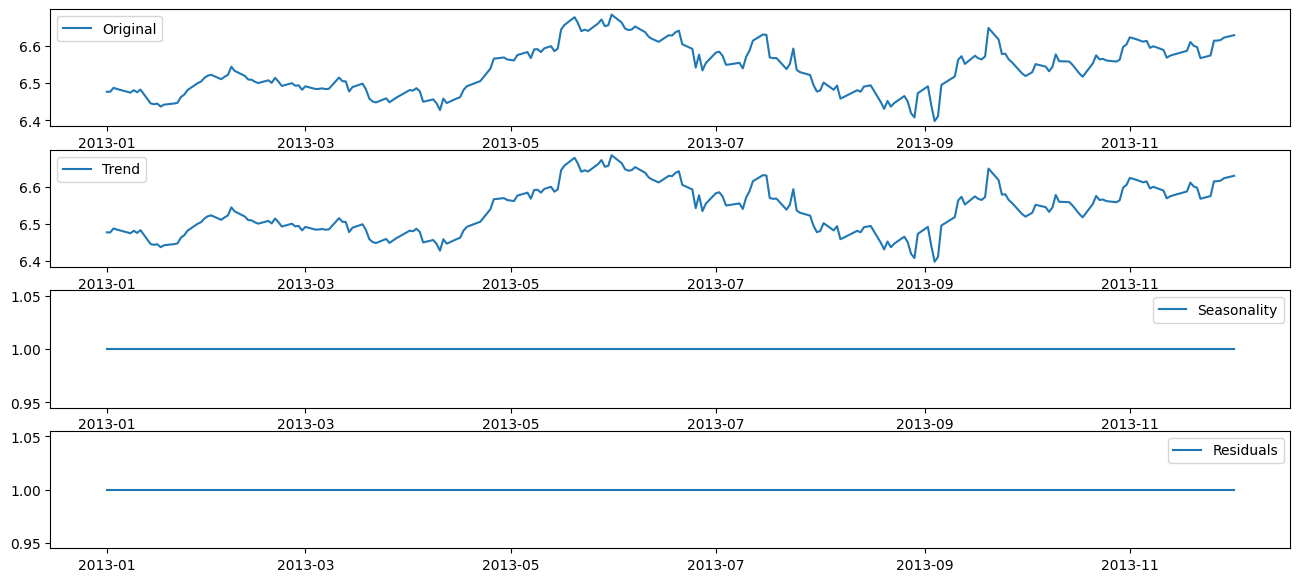

In [111]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_logged, period=1, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(data_logged, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')


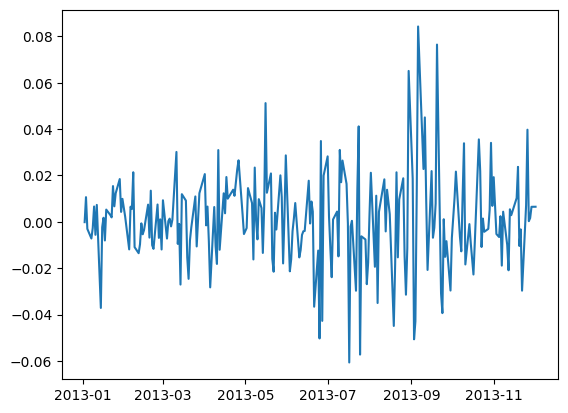

In [112]:
data_logged_diffed = data_logged - data_logged.shift()
plt.plot(data_logged_diffed)

In [113]:
result = adfuller(data_logged_diffed.dropna())  
# plt.plot(data_logged_diffed.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.087647
p-value: 0.000000
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


In [31]:
# Do not know if the p-value can actually be 0 or if I did something wrong, however I 
# do not know if I did something wrong or not.

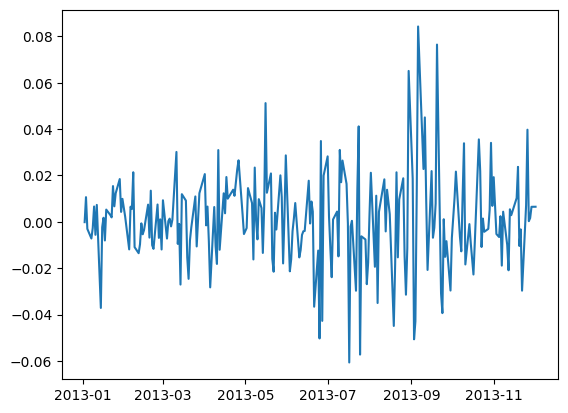

In [114]:
data_logged_diffed.dropna().sort_index(inplace= True)
plt.plot(data_logged_diffed.dropna())

In [115]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data_logged_diffed, nlags=20)
lag_pacf = pacf(data_logged_diffed, nlags=20)

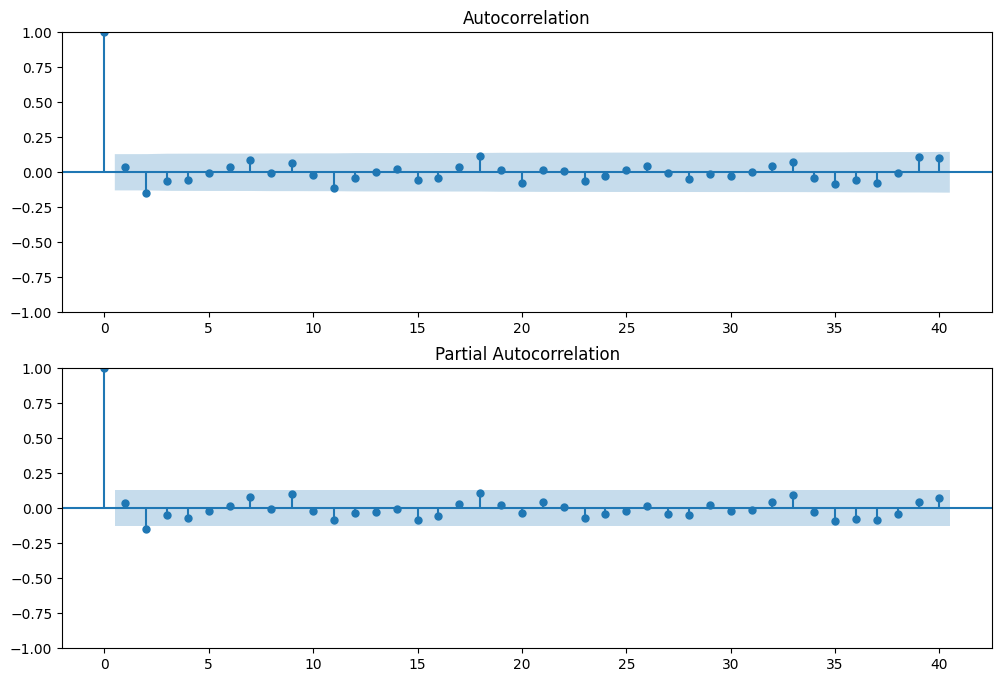

In [116]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_logged_diffed.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_logged_diffed.dropna(),lags=40,ax=ax2)

In [117]:
from statsmodels.tsa.arima_model import ARIMA

In [118]:
type(data_logged_diffed)

pandas.core.series.Series

In [119]:
data_logged_diffed = data_logged_diffed[~data_logged_diffed.isnull()]

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

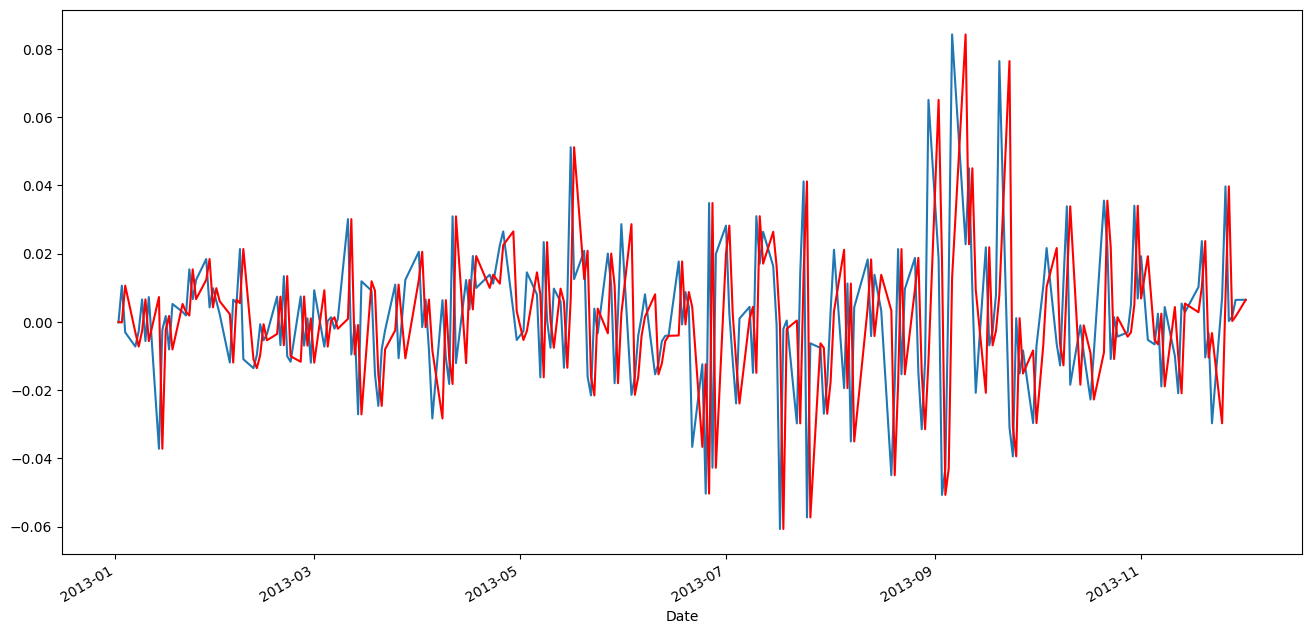

In [120]:
from statsmodels.tsa.arima.model import ARIMA
plt.figure(figsize=(16,8))

#data_logged_diffed = dropna(inplace=True)
model = ARIMA(data_logged_diffed, order=(0,1,0))  
results_ARIMA = model.fit()  

data_logged_diffed.plot(figsize=(16,8))  # This plots the Series directly
results_ARIMA.fittedvalues.plot(color='red')

In [121]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2013-01-02    0.000000
2013-01-03   -0.000154
2013-01-04    0.010636
2013-01-07   -0.003049
2013-01-08   -0.007203
dtype: float64


In [122]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2013-01-02    0.000000
2013-01-03   -0.000154
2013-01-04    0.010483
2013-01-07    0.007433
2013-01-08    0.000231
dtype: float64


In [123]:
ARIMA_log_prediction = pd.Series(data_logged.iloc[0], index=data_logged.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2013-01-01    6.477049
2013-01-02    6.477049
2013-01-03    6.476895
2013-01-04    6.487532
2013-01-07    6.484483
dtype: float64

In [124]:
results_ARIMA.predict(10,20)

Date
2013-01-16   -0.002304
2013-01-17    0.001749
2013-01-18   -0.008053
2013-01-21    0.005269
2013-01-22    0.002942
2013-01-23    0.001904
2013-01-24    0.015413
2013-01-25    0.006688
2013-01-28    0.012326
2013-01-29    0.018434
2013-01-30    0.004275
Name: predicted_mean, dtype: float64

Text(0.5, 1.0, 'RMSE: 13.8855')

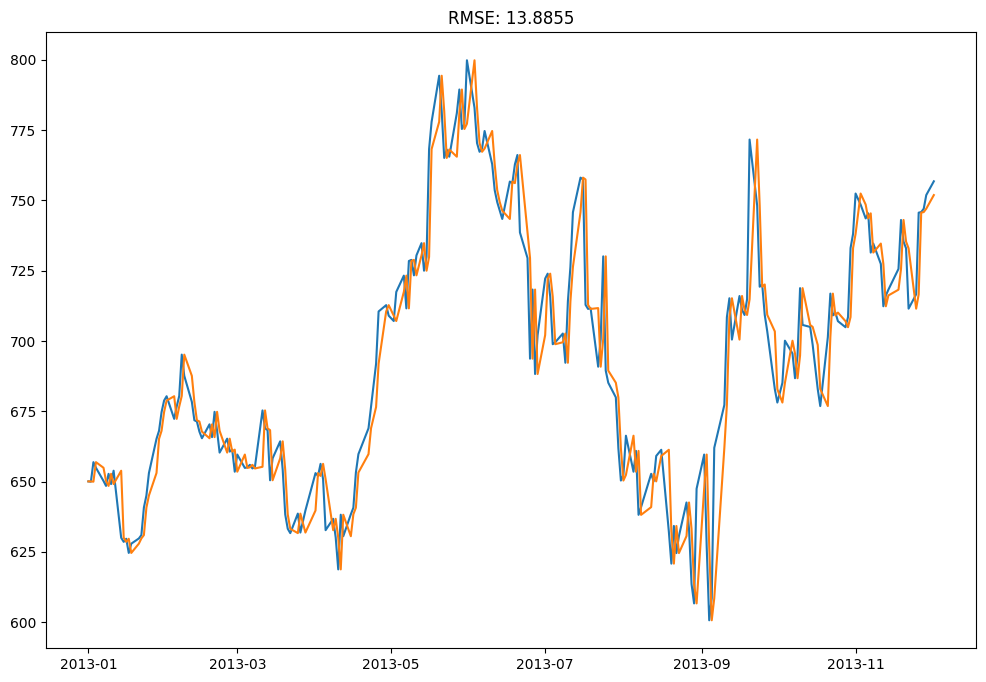

In [125]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))